In [84]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

plt.rcParams['font.size'] = 16

In [ ]:
def generate_data(nx, qtde):
    x = np.linspace(-1, 1, nx).reshape(-1, 1)
    y = []
    dy = []
    
    for _ in range(qtde//2):
        # Randomly generate parameters a and b
        a = np.random.uniform(0, 2)
        b = np.random.uniform(0, 2)
        
        # Construct polynomial and its derivative for degree 4 and 5
        polinomials = [
            x**2,                              # Degree 2
            (x**2 - a**2) * (x**2 - b**2),     # Degree 4
            (x**2 - a**2) * (x**2 - b**2) * x  # Degree 5
        ]
        derivatives = [
            2 * x,                                                                                # Derivative for degree 2
            ((2 * x) * (x**2 - b**2) + (x**2 - a**2) * (2 * x)),                                  # Derivative for degree 4
            ((x**2 - a**2) * (x**2 - b**2) + 2* x**2 * (x**2 - b**2) + 2 * x**2 * (x**2 - a**2))  # Derivative for degree 5
        ]
        
        # Randomly select degree 2, 4 or 5
        r = np.random.choice([0, 1, 2])
        
        # Add noise to the polynomial and its derivative
        noise_y = 0.01 * np.random.randn(len(x)).reshape(-1, 1)
        noise_dy = 0.01 * np.random.randn(len(x)).reshape(-1, 1)
        
        # Normalize and append to the list
        y.append(polinomials[r]/np.max(np.abs(polinomials[r])) + noise_y)
        dy.append(derivatives[r]/np.max(np.abs(derivatives[r])) + noise_dy)
    
    # Stack data
    y = np.hstack(y).T
    dy = np.hstack(dy).T
    return y, dy

# Generate data
y, dy = generate_data(20, 1000)

print(y.shape)
print(dy.shape)

(500, 20)
(500, 20)


In [ ]:
# Train and test split
X_train, X_test, y_train, y_test = train_test_split(y, dy, test_size=0.2, random_state=42)

neurons = 10
layers = 10

# Define the model
model = MLPRegressor(
    hidden_layer_sizes=tuple([neurons] * layers), 
    activation='tanh',
    solver='adam',
    max_iter=100000, 
    random_state=42,
    learning_rate='adaptive',
    learning_rate_init = 0.001,
    n_iter_no_change = 100,
    tol = 1e-10,
    verbose=True)

# treinamento
model.fit(X_train, y_train)

# teste
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)

print(f"Mean Squared Error: {mse}")

Iteration 1, loss = 0.32048587
Iteration 2, loss = 0.30436753
Iteration 3, loss = 0.29033446
Iteration 4, loss = 0.27806952
Iteration 5, loss = 0.26762832
Iteration 6, loss = 0.25861383
Iteration 7, loss = 0.25082656
Iteration 8, loss = 0.24389737
Iteration 9, loss = 0.23776267
Iteration 10, loss = 0.23245962
Iteration 11, loss = 0.22777643
Iteration 12, loss = 0.22359617
Iteration 13, loss = 0.21985898
Iteration 14, loss = 0.21638070
Iteration 15, loss = 0.21321486
Iteration 16, loss = 0.21022323
Iteration 17, loss = 0.20726271
Iteration 18, loss = 0.20458918
Iteration 19, loss = 0.20206014
Iteration 20, loss = 0.19964058
Iteration 21, loss = 0.19743690
Iteration 22, loss = 0.19529796
Iteration 23, loss = 0.19333425
Iteration 24, loss = 0.19152516
Iteration 25, loss = 0.18972730
Iteration 26, loss = 0.18801708
Iteration 27, loss = 0.18632578
Iteration 28, loss = 0.18467866
Iteration 29, loss = 0.18303191
Iteration 30, loss = 0.18143389
Iteration 31, loss = 0.17975562
Iteration 32, los

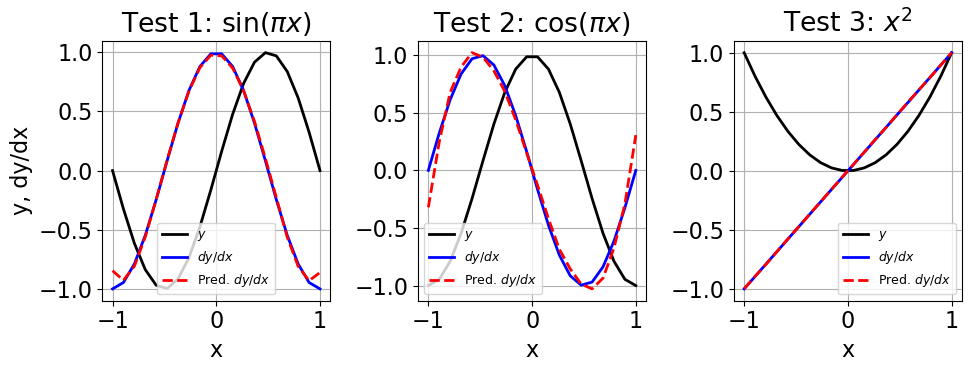

In [117]:
plt.figure(figsize=(10, 4))

new_x = np.linspace(-1, 1, y.shape[1]).reshape(1,-1)

# test 1
plt.subplot(131)
new_y = np.sin(np.pi*new_x)
new_dy = np.cos(np.pi*new_x)
predicted_derivative = model.predict(new_y)

plt.plot(new_x[0], new_y[0], label=r'$y$', color='black', lw=2)
plt.plot(new_x[0], new_dy[0], label=r'$dy/dx$', color='blue', lw=2)
plt.plot(new_x[0], predicted_derivative[0], label=r'Pred. $dy/dx$', color='red', ls='--', lw=2)
plt.xlabel('x')
plt.ylabel('y, dy/dx')
plt.title(r'Test 1: $\sin(\pi x)$')
plt.legend(fontsize=9, loc='lower center')
plt.grid(True)

# test 2
plt.subplot(132)
new_y = np.cos(np.pi*new_x)
new_dy = -np.sin(np.pi*new_x)
predicted_derivative = model.predict(new_y)

plt.plot(new_x[0], new_y[0], label=r'$y$', color='black', lw=2)
plt.plot(new_x[0], new_dy[0], label=r'$dy/dx$', color='blue', lw=2)
plt.plot(new_x[0], predicted_derivative[0], label=r'Pred. $dy/dx$', color='red', ls='--', lw=2)
plt.xlabel('x')
plt.legend(fontsize=9, loc='lower left')
plt.title(r'Test 2: $\cos(\pi x)$')
plt.grid(True)

# test 3
plt.subplot(133)
new_y = new_x ** 2
new_dy = 2 * new_x
new_dy = new_dy / np.max(np.abs(new_dy)) # Normalizing the derivative
predicted_derivative = model.predict(new_y)

plt.plot(new_x[0], new_y[0], label=r'$y$', color='black', lw=2)
plt.plot(new_x[0], new_dy[0], label=r'$dy/dx$', color='blue', lw=2)
plt.plot(new_x[0], predicted_derivative[0], label=r'Pred. $dy/dx$', color='red', ls='--', lw=2)
plt.xlabel('x')
plt.title(r'Test 3: $x^2$')
plt.legend(fontsize=9)
plt.grid(True)

plt.tight_layout()
plt.show()